In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import os
import configs
from math import floor, ceil

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
from utils_summary_statistics import *
import configs

In [3]:
if os.environ['USER'] == 'chingfang':
    engram_dir = '/Volumes/aronov-locker/Ching/barcodes2/' # Local Path
elif 'SLURM_JOBID' in os.environ.keys():
    engram_dir = '/mnt/smb/locker/aronov-locker/Ching/barcodes2/' # Axon Path
else:
    engram_dir = '/home/cf2794/engram/Ching/barcodes2/' # Cortex Path
exp_dir = os.path.join(engram_dir, 'capacity')

In [132]:
def get_performance(seed_output, spacing, n_caches):
    print(spacing)
    seed_output = seed_output/seed_output.max()
    cache_states = [int(n*spacing) for n in range(n_caches)]
    is_cache = np.zeros(seed_output.size).astype(bool)
    is_cache[cache_states] = True
    not_cache = np.logical_not(is_cache)
    true_pos = np.sum(seed_output[is_cache] > 0.5)/np.sum(is_cache)
    true_neg = np.sum(seed_output[not_cache] < 0.5)/np.sum(not_cache)
    accuracy = np.sum(seed_output[is_cache] > 0.5) + np.sum(seed_output[not_cache] < 0.5)
    accuracy /= seed_output.size
    return true_pos, true_neg, accuracy

In [130]:
os.listdir(exp_dir)

['.DS_Store',
 '0.22',
 '0.09',
 '0.12',
 '0.06',
 '0.01',
 '0.14',
 '0.25',
 '0.04',
 '0.17',
 '0.20']

In [133]:
results = {
    'place decay': [],
    'spacing': [],
    'n caches': [],
    'accuracy': [],
    'true pos': [],
    'true neg': []
}
for place_decay in os.listdir(exp_dir):
    if not place_decay.startswith('0.'): continue
    place_decay_dir = os.path.join(exp_dir, place_decay)
    place_decay = float(place_decay)
    
    for spacing in os.listdir(place_decay_dir):
        if not spacing.startswith('res'): continue
        spacing_dir = os.path.join(place_decay_dir, spacing)
        spacing = int(spacing.split('res')[-1])
        
        for n_caches in os.listdir(spacing_dir):
            if not n_caches.startswith('caches'): continue
            n_caches_dir = os.path.join(spacing_dir, n_caches)
            results_path = os.path.join(n_caches_dir, 'results.p')
            n_caches = int(n_caches.split('caches')[-1])
            if not os.path.exists(results_path): continue
            
            with open(results_path, 'rb') as f:
                _results = pickle.load(f)
                
            for random_seed in _results.keys():
                seed_output = _results[random_seed].squeeze()
                true_pos, true_neg, accuracy = get_performance(seed_output, spacing, n_caches)
                results['place decay'].append(place_decay)
                results['spacing'].append(spacing)
                results['n caches'].append(n_caches)
                results['accuracy'].append(accuracy)
                results['true pos'].append(true_pos)
                results['true neg'].append(true_neg)

110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130


/share/apps/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/share/apps/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/share/apps/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/share/apps/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110

160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110


160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110


160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10

140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180


10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
110
1

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
110
110
110
110
110
110
110
110
110
110


80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
170
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200

150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120


150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120


In [134]:
r = pd.DataFrame(results)

In [135]:
r

,place decay,spacing,n caches,accuracy,true pos,true neg
0,0.22,110,3,0.796,1.000000,0.795386
1,0.22,110,3,0.737,1.000000,0.736209
2,0.22,110,3,0.774,1.000000,0.773320
3,0.22,110,3,0.719,1.000000,0.718154
4,0.22,110,3,0.774,1.000000,0.773320
5,0.22,110,3,0.830,0.666667,0.830491
6,0.22,110,3,0.806,0.666667,0.806419
7,0.22,110,3,0.735,1.000000,0.734203
8,0.22,110,3,0.726,1.000000,0.725176
9,0.22,110,3,0.764,1.000000,0.763290


In [156]:
plot_df = {
    'place decay': [],
    'max caches': [],
    'spacing': []
    }

for place_decay in r['place decay'].unique():
    _r = r[r['place decay']==place_decay].copy()

    spacings = np.sort(np.unique(_r['spacing']))
    max_caches = 0
    min_spacing = 0
    for spacing in spacings:
        __r = _r[_r['spacing']==spacing].copy()
        n_caches = np.sort(np.unique(__r['n caches']))
        for n_cache in n_caches:
            ___r = __r[__r['n caches']==n_cache].copy()
            true_pos = ___r['true pos'].mean()
            true_neg = ___r['true neg'].mean()
            if true_pos > 0.95 and true_neg > 0.7:
                if n_cache > max_caches:
                    max_caches = n_cache
                    min_spacing = spacing
    plot_df['place decay'].append(place_decay)
    plot_df['max caches'].append(max_caches)
    plot_df['spacing'].append(min_spacing)

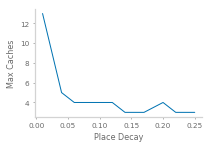

In [159]:
plt.figure(figsize=(3,2))
sns.lineplot(x='place decay', y='max caches', data=plot_df)
plt.ylabel('Max Caches')
plt.xlabel('Place Decay')
plt.show()

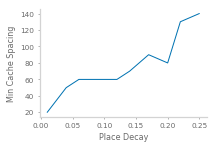

In [160]:
plt.figure(figsize=(3,2))
sns.lineplot(x='place decay', y='spacing', data=plot_df)
plt.ylabel('Min Cache Spacing')
plt.xlabel('Place Decay')
plt.show()

In [167]:
_r = r[r['place decay']==0.01]

In [170]:
_r[_r['spacing']==20]

,place decay,spacing,n caches,accuracy,true pos,true neg
9965,0.01,20,33,0.363,1.000000,0.341262
9966,0.01,20,33,0.357,1.000000,0.335057
9967,0.01,20,33,0.000,0.000000,0.000000
9968,0.01,20,33,0.361,1.000000,0.339193
9969,0.01,20,33,0.357,1.000000,0.335057
9970,0.01,20,26,0.496,1.000000,0.482546
9971,0.01,20,26,0.497,1.000000,0.483573
9972,0.01,20,26,0.000,0.000000,0.000000
9973,0.01,20,26,0.491,1.000000,0.477413
9974,0.01,20,26,0.489,1.000000,0.475359


In [164]:
1000/20

50.0